In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def show(img):
  if img.ndim == 2:
    plt.imshow( img, cmap='gray')
  else:
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.show()

In [15]:
def extract_small_targets(image_path, min_area=100):
    # 读取图片
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 二值化
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 寻找轮廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 提取红外弱小目标
    small_targets = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            small_targets.append(contour)
    return small_targets

In [16]:
if __name__ == "__main__":
    image_path = "./红外弱小目标提取样例/0001.bmp"
    small_targets = extract_small_targets(image_path)
    print("找到的红外弱小目标数量：", len(small_targets))

找到的红外弱小目标数量： 1


In [7]:
def extract_small_targets(image_path, min_area=400):
    # 读取图片
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # 二值化
    _, binary = cv2.threshold(image, 160, 200, cv2.THRESH_BINARY)
    # 寻找轮廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 提取红外弱小目标
    small_targets = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            small_targets.append(contour)
    # 在图像上绘制矩形框
    for target in small_targets:
        x, y, w, h = cv2.boundingRect(target)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return image,small_targets

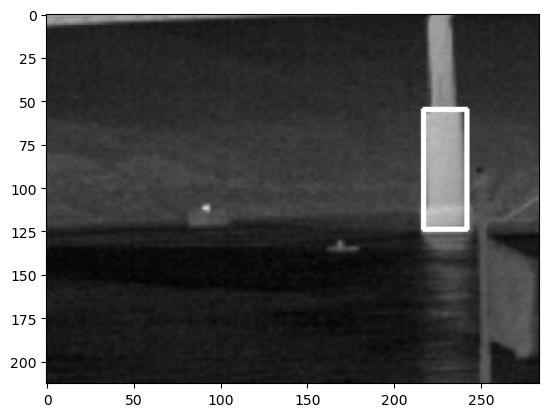

1


In [8]:
if __name__ == "__main__":
    image_path = "./红外弱小目标提取样例/0007.bmp"
    result,small_targets = extract_small_targets(image_path)
    show(result)
    print(len(small_targets))

In [38]:
def extract_small_targets(image_path, min_area=900):
    # 读取图片
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 二值化
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # 寻找轮廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 提取红外弱小目标
    small_targets = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            small_targets.append(contour)
    return small_targets

In [39]:
ori_path = './红外弱小目标提取样例/'
save_path = './Result/'
num = os.listdir(ori_path) 
print('共{}张图片'.format(len(num)))
for i in range(len(num)):
    small_targets = extract_small_targets(ori_path+num[i])
    print("图"+str(num[i])+"找到的红外弱小目标数量：", len(small_targets))
#     img = cv.imread(ori_path+num[i])  # 读取

共10张图片
图0008.bmp找到的红外弱小目标数量： 0
图0009.bmp找到的红外弱小目标数量： 0
图0001.bmp找到的红外弱小目标数量： 1
图0002.bmp找到的红外弱小目标数量： 1
图0003.bmp找到的红外弱小目标数量： 1
图0007.bmp找到的红外弱小目标数量： 1
图0006.bmp找到的红外弱小目标数量： 1
图0010.bmp找到的红外弱小目标数量： 0
图0004.bmp找到的红外弱小目标数量： 0
图0005.bmp找到的红外弱小目标数量： 0
